<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Feature_Engineer_Rare_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data= pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/mercedes-benz-greener-manufacturing.csv')
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [14]:
cols_to_use = ['X1', 'X2', 'X3', 'X6']

for col in cols_to_use:
    print('variable: ', col, ' number of labels: ', len(data[col].unique()))
    
print('total cars: ', len(data))

variable:  X1  number of labels:  27
variable:  X2  number of labels:  44
variable:  X3  number of labels:  7
variable:  X6  number of labels:  12
total cars:  4209


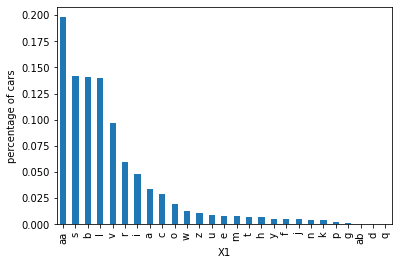

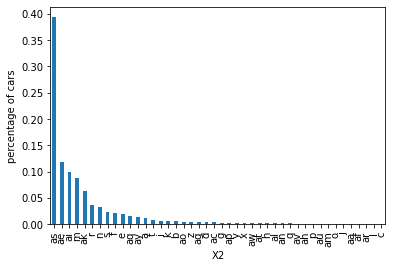

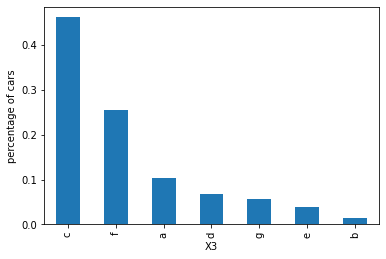

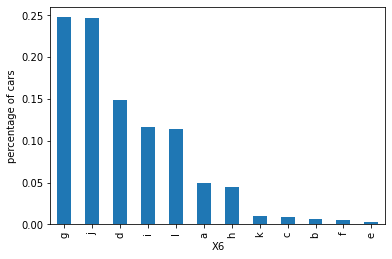

In [15]:
total_cars = len(data)

for col in cols_to_use:
    # count the number of observations per label and divide by total 
    # number of cars
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage of cars')
    plt.show()

In [16]:
temp_df = pd.Series(data['X3'].value_counts() / total_cars).reset_index()
temp_df.columns = ['X3', 'X3_perc_cars']
temp_df

,X3,X3_perc_cars
0,c,0.461392
1,f,0.255643
2,a,0.104538
3,d,0.068900
4,g,0.057258
5,e,0.038727
6,b,0.013542


In [17]:
data.groupby(['X3'])['y'].mean().reset_index()

,X3,y
0,a,102.507477
1,b,100.239649
2,c,101.959269
3,d,105.114414
4,e,100.033190
5,f,96.564507
6,g,100.428672


In [18]:
temp_df = temp_df.merge(
    data.groupby(['X3'])['y'].mean().reset_index(), on='X3', how='left')

temp_df

,X3,X3_perc_cars,y
0,c,0.461392,101.959269
1,f,0.255643,96.564507
2,a,0.104538,102.507477
3,d,0.068900,105.114414
4,g,0.057258,100.428672
5,e,0.038727,100.033190
6,b,0.013542,100.239649


Text(0, 0.5, 'Seconds')

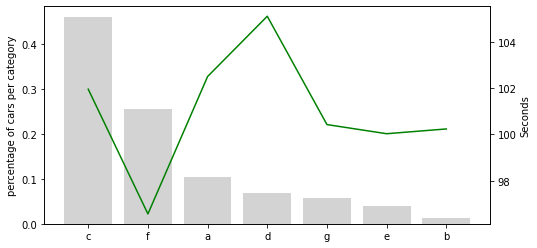

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(temp_df.index, temp_df['X3'], rotation=0)

ax2 = ax.twinx()
ax.bar(temp_df.index, temp_df["X3_perc_cars"], color='lightgrey')
ax2.plot(temp_df.index, temp_df["y"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

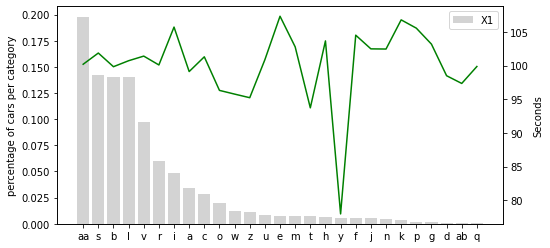

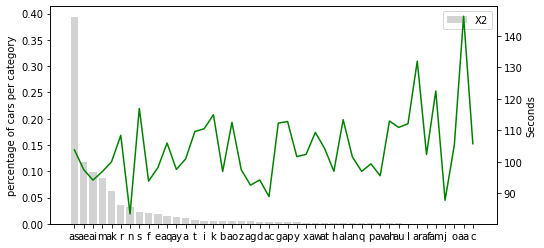

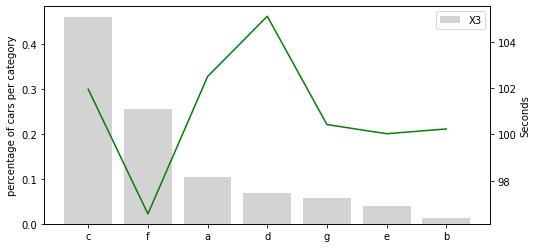

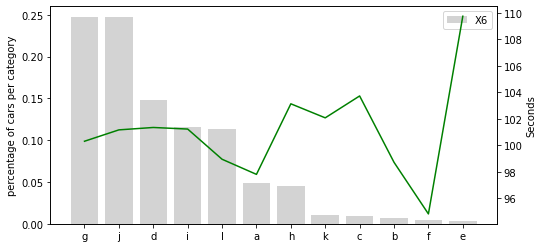

In [20]:
for col in cols_to_use:
    # calculate the frequency of the different labels in the variable
    temp_df = pd.Series(data[col].value_counts() / total_cars).reset_index()

    # rename the columns
    temp_df.columns = [col, col + '_perc_cars']

    # merge onto the mean time to pass the test
    temp_df = temp_df.merge(
        data.groupby([col])['y'].mean().reset_index(), on=col, how='left')

    # plot the figure as shown above
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()

    ax.bar(
        temp_df.index,
        temp_df[col + '_perc_cars'],
        color='lightgrey',
        label=col)

    ax2.plot(
        temp_df.index,
        temp_df["y"],
        color='green',
    )

    ax.set_ylabel('percentage of cars per category')
    ax2.set_ylabel('Seconds')
    ax.legend()
    plt.show()

In [21]:
temp_df = pd.Series(data['X1'].value_counts() / total_cars)
temp_df.sort_values(ascending=False)
temp_df

aa    0.197909
s     0.142077
b     0.140651
l     0.140176
v     0.096935
r     0.059634
i     0.048230
a     0.033975
c     0.028748
o     0.019482
w     0.012354
z     0.010929
u     0.008791
e     0.007840
m     0.007603
t     0.007365
h     0.006890
y     0.005464
f     0.005464
j     0.005227
n     0.004514
k     0.004039
p     0.002138
g     0.001426
d     0.000713
ab    0.000713
q     0.000713
Name: X1, dtype: float64

In [22]:
temp_df[temp_df >= 0.1].index

Index(['aa', 's', 'b', 'l'], dtype='object')

In [23]:
grouping_dict = {
    k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)
    for k in temp_df.index
}

grouping_dict

{'a': 'rare',
 'aa': 'aa',
 'ab': 'rare',
 'b': 'b',
 'c': 'rare',
 'd': 'rare',
 'e': 'rare',
 'f': 'rare',
 'g': 'rare',
 'h': 'rare',
 'i': 'rare',
 'j': 'rare',
 'k': 'rare',
 'l': 'l',
 'm': 'rare',
 'n': 'rare',
 'o': 'rare',
 'p': 'rare',
 'q': 'rare',
 'r': 'rare',
 's': 's',
 't': 'rare',
 'u': 'rare',
 'v': 'rare',
 'w': 'rare',
 'y': 'rare',
 'z': 'rare'}

In [24]:
data['X1_grouped'] = data['X1'].map(grouping_dict)
data[['X1', 'X1_grouped']].head(10)

,X1,X1_grouped
0,v,rare
1,t,rare
2,w,rare
3,t,rare
4,v,rare
5,b,b
6,r,rare
7,l,l
8,s,s
9,b,b


In [25]:
for col in cols_to_use[1:]:
    
    # calculate the % of cars in each category
    temp_df = pd.Series(data[col].value_counts() / total_cars)

    # create a dictionary to replace the rare labels with the
    # string 'rare'
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)
        for k in temp_df.index
    }
    
    # replace the rare labels
    data[col + '_grouped'] = data[col].map(grouping_dict)

data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,rare,rare,a,j
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,rare,rare,rare,l
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,rare,rare,c,j
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,rare,rare,f,l
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,rare,rare,f,d


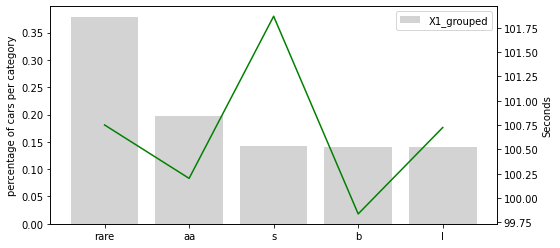

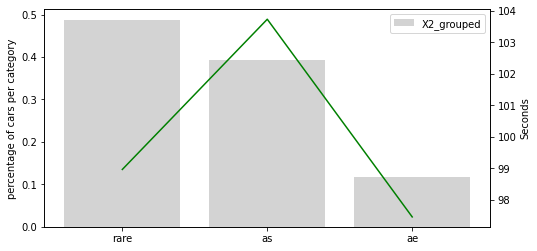

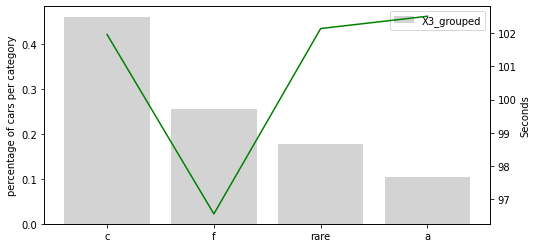

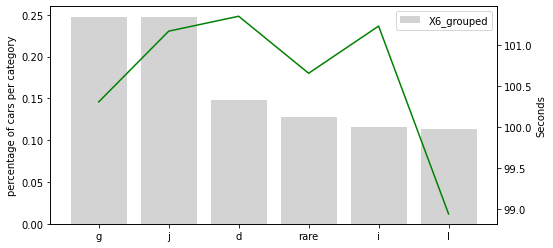

In [26]:
for col in ['X1_grouped', 'X2_grouped', 'X3_grouped', 'X6_grouped']:
    
    # calculate the frequency of the different labels in the variable
    temp_df = pd.Series(data[col].value_counts() / total_cars).reset_index()

    # rename the columns
    temp_df.columns = [col, col + '_perc_cars']

    # merge onto the mean time to pass the test
    temp_df = temp_df.merge(
        data.groupby([col])['y'].mean().reset_index(), on=col, how='left')

    # plot
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()

    ax.bar(
        temp_df.index,
        temp_df[col + '_perc_cars'],
        color='lightgrey',
        label=col)

    ax2.plot(
        temp_df.index,
        temp_df["y"],
        color='green',
    )

    ax.set_ylabel('percentage of cars per category')
    ax2.set_ylabel('Seconds')
    ax.legend()
    plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use], data.y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2946, 4), (1263, 4))

In [28]:
unique_to_train_set = [
    x for x in X_train['X2'].unique() if x not in X_test['X2'].unique()
]

print(unique_to_train_set)

['l', 'aa', 'au', 'o', 'af', 'c', 'am']


In [29]:
unique_to_test_set = [
    x for x in X_test['X2'].unique() if x not in X_train['X2'].unique()
]

print(unique_to_test_set)

['ar', 'j']


In [30]:
for col in cols_to_use:
    # create the dic and replace the strings in one line
    data.loc[:, col] = data.loc[:, col].map(
        {k: i
         for i, k in enumerate(data[col].unique(), 0)})

# variables with grouped categories
for col in ['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']:
    # create the dic and replace the strings in one line
    data.loc[:, col] = data.loc[:, col].map(
        {k: i
         for i, k in enumerate(data[col].unique(), 0)})

data.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,0,130.81,k,0,0,0,d,u,0,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6,88.53,k,1,1,1,d,y,1,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,7,76.26,az,2,2,2,d,x,0,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
3,9,80.62,az,1,2,3,d,x,1,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
4,13,78.02,az,0,2,3,d,h,2,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2
5,18,92.93,t,3,3,2,d,g,3,s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,3
6,24,128.76,al,4,3,3,d,f,3,s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,3
7,25,91.91,o,5,4,3,d,f,0,a,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,3,0
8,27,108.67,w,6,4,1,d,f,4,h,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,1,1,4
9,30,126.99,j,3,5,2,d,f,5,e,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,3


In [31]:
cols_to_use

['X1', 'X2', 'X3', 'X6']

In [32]:
cols_grouped = ['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']
cols_grouped

['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']

In [33]:
cols = cols_to_use+cols_grouped

In [34]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols],
    data.y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2946, 8), (1263, 8))

In [35]:
rf = RandomForestRegressor(n_estimators=300,
                           max_depth=34,
                           random_state=39)

# train the model
rf.fit(X_train[cols_to_use], y_train)

# make and print predictions in train and test sets
print('Train set')
pred = rf.predict(X_train[cols_to_use])
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = rf.predict(X_test[cols_to_use])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, pred)))

Train set
Random Forests mse: 73.91420367780387
Random Forests r2: 0.524089147901724
Test set
Random Forests mse: 151.10099965156573
Random Forests r2: 0.1261592100558474


In [36]:
rf = RandomForestRegressor(n_estimators=300,
                           max_depth=4,
                           random_state=39)

# train the model
rf.fit(X_train[cols_grouped], y_train)

# make and print preditions
print('Train set')
pred = rf.predict(X_train[cols_grouped])
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = rf.predict(X_test[cols_grouped])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, pred)))

Train set
Random Forests mse: 136.10890251001152
Random Forests r2: 0.12363658744046446
Test set
Random Forests mse: 154.78054883151322
Random Forests r2: 0.10487979979742335


In [37]:
# model build on data with all the categories

ada = AdaBoostRegressor(n_estimators=400, random_state=44)
ada.fit(X_train[cols_to_use], y_train)
print('Train set')
pred = ada.predict(X_train[cols_to_use])
print('AdaBoost mse: {}'.format(mean_squared_error(y_train, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = ada.predict(X_test[cols_to_use])
print('AdaBoost mse: {}'.format(mean_squared_error(y_test, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_test, pred)))

Train set
AdaBoost mse: 152.55660134599108
AdaBoost r2: 0.017734907132739508
Test set
AdaBoost mse: 172.10171312106795
AdaBoost r2: 0.004708788881281345


In [38]:
# model build on data with fewer categories in Cabin Variable

ada = AdaBoostRegressor(n_estimators=400, random_state=44)
ada.fit(X_train[cols_grouped], y_train)
print('Train set')
pred = ada.predict(X_train[cols_grouped])
print('AdaBoost mse: {}'.format(mean_squared_error(y_train, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = ada.predict(X_test[cols_grouped])
print('AdaBoost mse: {}'.format(mean_squared_error(y_test, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_test, pred)))

Train set
AdaBoost mse: 149.4235105602519
AdaBoost r2: 0.03790791626156742
Test set
AdaBoost mse: 166.59119412837987
AdaBoost r2: 0.036576984860637984


In [39]:
linreg = LinearRegression()
linreg.fit(X_train[cols_to_use], y_train)
print('Train set')
pred = linreg.predict(X_train[cols_to_use])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Linear Regression r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[cols_to_use])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print('Linear Regression r2e: {}'.format(r2_score(y_test, pred)))

Train set
Linear Regression mse: 154.61105621770932
Linear Regression r2: 0.004506903312812227
Test set
Linear Regression mse: 172.95013673475464
Linear Regression r2e: -0.00019777800114084698


In [40]:
# model build on data with infrequent categories grouped under one label

linreg = LinearRegression()
linreg.fit(X_train[cols_grouped], y_train)
print('Train set')
pred = linreg.predict(X_train[cols_grouped])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Linear Regression r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[cols_grouped])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print('Linear Regression r2e: {}'.format(r2_score(y_test, pred)))

Train set
Linear Regression mse: 151.4575537952273
Linear Regression r2: 0.024811336700465203
Test set
Linear Regression mse: 169.30336571670514
Linear Regression r2e: 0.020892071003870694
